In [3]:
import pandas as pd

#load dataset
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Newfolder\Project4\swiggy.csv')

df.head()   #view first few rows

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148312 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148312 non-null  int64 
 1   name          148312 non-null  object
 2   city          148312 non-null  object
 3   rating        148312 non-null  object
 4   rating_count  148312 non-null  object
 5   cost          148267 non-null  object
 6   cuisine       148299 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148312 non-null  object
 9   address       148312 non-null  object
 10  menu          148312 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.6+ MB


In [ ]:
df.isnull().sum()  #This checks for missing values (NaN) in the DataFrame df.

id               0
name             0
city             0
rating           0
rating_count     0
cost            45
cuisine         13
lic_no           0
link             0
address          0
menu             0
dtype: int64

In [ ]:
df = df.dropna(subset=['name', 'rating','rating_count','lic_no']) 

#This removes rows where any of the specified columns (name, rating, rating_count, lic_no) have NaN values.

#Ensures all rows kept have valid entries in those columns.

In [ ]:
df = df.dropna(subset=['cuisine','cost'])

#Similar to the previous step, but specifically targeting missing values in cuisine and cost.

#Further cleans the dataset by ensuring cuisine and cost are present in all rows.

In [ ]:
#After dropping rows with missing values, this checks again for any remaining NaN values.

#Useful for verifying how much missing data remains.

df.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

In [ ]:
#Displays all unique values present in the rating column.

print(df['rating'].unique())

['--' '4.4' '3.8' '3.7' '3.6' '4.0' '4.2' '4.7' '4.1' '3.5' '3.1' '3.4'
 '3.3' '4.8' '3.9' '2.7' '4.3' '2.9' '4.5' '2.5' '3.2' '2.4' '4.6' '3.0'
 '2.8' '2.3' '5.0' '2.6' '2.2' '1.4' '1.9' '4.9' '2.1' '1.3' '2.0' '1.8'
 '1.6' '1.1' '1.5' '1.0' '1.2' '1.7']


In [22]:
df.isnull().sum()

id                  0
name                0
city                0
rating          86912
rating_count        0
cost                0
cuisine             0
lic_no              0
link                0
address             0
menu                0
dtype: int64

In [23]:
print(df['rating'].unique())

[nan 4.4 3.8 3.7 3.6 4.  4.2 4.7 4.1 3.5 3.1 3.4 3.3 4.8 3.9 2.7 4.3 2.9
 4.5 2.5 3.2 2.4 4.6 3.  2.8 2.3 5.  2.6 2.2 1.4 1.9 4.9 2.1 1.3 2.  1.8
 1.6 1.1 1.5 1.  1.2 1.7]


In [25]:
# Converts the 'rating' column to numeric values.
# Any values that cannot be converted to numbers (e.g., 'N/A', 'abc') will be replaced with NaN (missing value).
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Prints the data type of the 'rating' column to confirm it's now numeric (float64).
print(df['rating'].dtype)

float64


In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].median())   #	Fills NaN with median rating

In [ ]:
# Checks if there are any remaining NaN values in the 'rating' column.

print(df['rating'].isna().sum())  # should print 0 if all NaNs were filled or it should show the value 


0


In [28]:
# Checks again the datatype of the 'rating' column to ensure it remains float after filling.

print(df['rating'].dtype)


float64


In [ ]:
# Removes duplicate rows based on the 'name' column.
# Useful if the same restaurant name appears multiple times in the dataset.


df = df.drop_duplicates(subset='name')       #Keeps unique restaurants based on name

# Prints the shape of the DataFrame after removing duplicates.
# Shape shows (rows, columns)
print("After removing duplicates based on 'name':", df.shape)


After removing duplicates based on 'name': (112683, 11)


In [ ]:
# Shows all the unique values in the 'rating_count' column.
# Helps to understand how the rating count is expressed in the data.

print(df['rating_count'].unique())    #	Shows the categories present for number of ratings


['Too Few Ratings' '50+ ratings' '100+ ratings' '20+ ratings'
 '500+ ratings' '1K+ ratings' '5K+ ratings' '10K+ ratings']


In [31]:


#import pandas as pd
import numpy as np

# Example: Convert to string for processing
df['rating_count'] = df['rating_count'].astype(str)  # ➔ Ensures all values are strings


In [32]:
# Handle 'Too Few Ratings' → np.nan temporarily (or 0 if you want)
df['rating_count'] = df['rating_count'].replace('Too Few Ratings', np.nan)  # ➔ Replace text with np.nan


In [36]:
# Remove '+ ratings' and replace 'K' with '000'
df['rating_count'] = df['rating_count'].str.replace('+ ratings', '', regex=False)  # ➔ Removes the '+ ratings' part from values like '50+ ratings' → '50'

df['rating_count'] = df['rating_count'].str.replace('K', '000')  # ➔ Converts 'K' → '000' (e.g., '1K' → '1000', '5K' → '5000')


In [38]:
# Remove any remaining non-numeric characters (just in case)
df['rating_count'] = df['rating_count'].str.extract('(\d+)', expand=False)  # ➔ Extracts only the **digits** from each value. Removes anything else.


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9412\3873193012.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['rating_count'] = df['rating_count'].str.extract('(\d+)', expand=False)  # ➔ Extracts only the **digits** from each value. Removes anything else.


In [39]:
# Convert to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')  # ➔ Converts the cleaned strings to actual **numeric (integer/float)** data.
# Any problematic values that still can't be converted → NaN (though ideally, none should remain)



In [40]:
# Check the cleaned output
print(df['rating_count'].unique())  # ➔ Prints the unique **cleaned numeric values** of 'rating_count'.


[   nan    50.   100.    20.   500.  1000.  5000. 10000.]


In [41]:
#NEXT FOR CITY AND MAIN CITY EXTRACT 

print(df['city'].unique())


['Abohar' 'Adilabad' 'Adityapur' 'Adoni' 'Agartala' 'Agra'
 'Vastrapur,Ahmedabad' 'GOTA,Ahmedabad' 'Paldi & Ambawadi,Ahmedabad'
 'Ghatlodia,Ahmedabad' 'Bopal,Ahmedabad' 'Gandhinagar,Ahmedabad'
 'LalDarwaja,Ahmedabad' 'Naranpura,Ahmedabad' 'Navrangpura,Ahmedabad'
 'Science City,Ahmedabad' 'Maninagar,Ahmedabad' 'Chandkheda,Ahmedabad'
 'Ahmednagar' 'Aizawl' 'Ajmer' 'Akola' 'Alappuzha' 'Aligarh' 'Alipurduar'
 'Allahabad' 'Alwar' 'Ambala' 'Ambikapur' 'Ambur' 'Amravati' 'Amreli'
 'Amritsar' 'Anand' 'Anantapur' 'Ankleshwar' 'Arakkonam' 'Arambagh'
 'Arrah' 'Aruppukottai' 'Asansol' 'Aurangabad' 'Aurangabad_bihar'
 'Azamgarh' 'Baddi' 'Bagalkot' 'Bagdogra' 'Bahadurgarh' 'Bahraich'
 'Balaghat' 'Balangir' 'Balasore' 'Ballari' 'Balrampur' 'Balurghat'
 'Banda' 'Yeshwanthpur,Bangalore' 'Geddalahalli,Bangalore'
 'Koramangala,Bangalore' 'JP Nagar,Bangalore' 'Mahadevpura,Bangalore'
 'HSR,Bangalore' 'Arekere,Bangalore' 'Indiranagar,Bangalore'
 'Banashankari,Bangalore' 'Whitefield,Bangalore'
 'Nagavara & H

In [42]:
#  way to extract city using str.split() directly  , .str.split() → vectorized (faster for large datasets).
df['city'] = df['city'].str.split(',').str[-1].str.strip()  #.str[-1] → picks the last part of the split.

# Display unique cleaned city names
print(df['city'].unique())


['Abohar' 'Adilabad' 'Adityapur' 'Adoni' 'Agartala' 'Agra' 'Ahmedabad'
 'Ahmednagar' 'Aizawl' 'Ajmer' 'Akola' 'Alappuzha' 'Aligarh' 'Alipurduar'
 'Allahabad' 'Alwar' 'Ambala' 'Ambikapur' 'Ambur' 'Amravati' 'Amreli'
 'Amritsar' 'Anand' 'Anantapur' 'Ankleshwar' 'Arakkonam' 'Arambagh'
 'Arrah' 'Aruppukottai' 'Asansol' 'Aurangabad' 'Aurangabad_bihar'
 'Azamgarh' 'Baddi' 'Bagalkot' 'Bagdogra' 'Bahadurgarh' 'Bahraich'
 'Balaghat' 'Balangir' 'Balasore' 'Ballari' 'Balrampur' 'Balurghat'
 'Banda' 'Bangalore' 'Bantwal' 'Bapatlachirala' 'Baramati' 'Baran'
 'Bardhaman' 'Bardoli' 'Bareilly' 'Barmer' 'Barnala' 'Barshi' 'Barwani'
 'Basirhat' 'Basti' 'Batala' 'Bathinda' 'Beawar' 'Beed' 'Begusarai'
 'Bela-pratapgarh' 'Belgaum' 'Berhampore' 'Berhampur' 'Bettiah' 'Betul'
 'Bhadohi' 'Bhadrachalam' 'Bhagalpur' 'Bhandara' 'Bharabanki' 'Bharatpur'
 'Bharuch' 'Bhatkal' 'Bhavnagar' 'Bhawanipatna' 'Bhilai' 'Bhilwara'
 'Bhimavaram' 'Bhind' 'Bhiwadi' 'Bhiwani' 'Bhopal' 'Bhubaneswar' 'Bhuj'
 'Bhusawal' 'Bidar' 'Bi

In [ ]:
# Remove currency symbol and commas using regex in a single step

#[₹,] → removes ₹ or , wherever they occur.

#.astype(float) → converts to numeric in the same step.

df['cost'] = df['cost'].astype(str).str.replace(r'[₹,]', '', regex=True).astype(float)


In [44]:
display(df)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,4.0,NaN,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50.0,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100.0,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20.0,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,4.0,NaN,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,4.0,NaN,200.0,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,4.0,NaN,300.0,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,4.0,NaN,300.0,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,4.0,NaN,250.0,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [46]:
#SAVE NOW THE CLEANED DATA AS CSV 


df.to_csv(r"C:\Users\LENOVO\Desktop\Newfolder\Project4\output4\cleaned_data1.csv")

In [48]:
#read the file or check
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Newfolder\Project4\output4\cleaned_data1.csv")

display(df)

,Unnamed: 0,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,0,567335,AB FOODS POINT,Abohar,4.0,NaN,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,1,531342,Janta Sweet House,Abohar,4.4,50.0,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,2,158203,theka coffee desi,Abohar,3.8,100.0,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,3,187912,Singh Hut,Abohar,3.7,20.0,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,4,543530,GRILL MASTERS,Abohar,4.0,NaN,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...,...
112678,148536,553122,The Food Delight,Yavatmal,4.0,NaN,200.0,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
112679,148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,4.0,NaN,300.0,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
112680,148538,559435,Cafe Bella Ciao,Yavatmal,4.0,NaN,300.0,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
112681,148539,418989,GRILL ZILLA,Yavatmal,4.0,NaN,250.0,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112683 entries, 0 to 112682
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    112683 non-null  int64  
 1   id            112683 non-null  int64  
 2   name          112683 non-null  object 
 3   city          112683 non-null  object 
 4   rating        112683 non-null  float64
 5   rating_count  39200 non-null   float64
 6   cost          112683 non-null  float64
 7   cuisine       112683 non-null  object 
 8   lic_no        112683 non-null  object 
 9   link          112683 non-null  object 
 10  address       112683 non-null  object 
 11  menu          112683 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 10.3+ MB


In [51]:
# Display the column names
print(df.columns)

Index(['Unnamed: 0', 'id', 'name', 'city', 'rating', 'rating_count', 'cost',
       'cuisine', 'lic_no', 'link', 'address', 'menu'],
      dtype='object')


In [71]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Load the cleaned data
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Newfolder\Project4\output4\cleaned_data1.csv")

# Select categorical columns for encoding
categorical_columns = ['city', 'cuisine']# Dropped 'name' to prevent memory issues

##Optional: reduce unique cuisines by splitting and picking first (only if cuisine is a list)
df['cuisine'] = df['cuisine'].str.split(',').str[0]

# Set up encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit-transform encoding
encoded_array = encoder.fit_transform(df[categorical_columns])

# Create encoded DataFrame
encoded_df = pd.DataFrame(encoded_array,
                          columns=encoder.get_feature_names_out(categorical_columns),
                          index=df.index)

# Drop categorical columns and concatenate
numerical_df = df.drop(columns=categorical_columns)
final_encoded_df = pd.concat([numerical_df, encoded_df], axis=1)

In [72]:
# Save to CSV and encoder.pkl
final_encoded_df.to_csv("encoded_data.csv", index=False)

In [73]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print(" Encoding complete: Saved as encoded_data.csv and encoder.pkl")


 Encoding complete: Saved as encoded_data.csv and encoder.pkl


In [ ]:
import pandas as pd


#Ensure the indices of cleaned_data.csv and encoded_data.csv match

df_cleaned = pd.read_csv(r'C:\Users\LENOVO\Desktop\Newfolder\Project4\output4\cleaned_data1.csv')
df_encoded = pd.read_csv(r'C:\Users\LENOVO\Desktop\Newfolder\Project4\encoded_data.csv')

In [74]:
# Check row counts
if df.shape[0] == encoded_df.shape[0]:
    print(" Row count matches.")
else:
    print(" Row count mismatch!")

# Check index match
if (df.index == encoded_df.index).all():
    
    print(" Index match confirmed.")
else:
    
    print(" ℹIndex mismatch. Resetting index...")
    df.reset_index(drop=True, inplace=True)
    encoded_df.reset_index(drop=True, inplace=True)
    print(" Index reset and matched.")


 Row count matches.
 Index match confirmed.


In [75]:
print(df.index.equals(final_encoded_df.index))  # Should print True


True


In [77]:
#check columns and index same or not 

# Confirm again
if df.index.equals(encoded_df.index):
    print("✅ Indices are aligned. Safe to merge or use together.")


✅ Indices are aligned. Safe to merge or use together.


In [ ]:
#Displays the missing value count in the output
print(X.isna().sum())


Unnamed: 0                0
id                        0
rating                    0
rating_count          73483
cost                      0
                      ...  
cuisine_Tibetan           0
cuisine_Tribal            0
cuisine_Turkish           0
cuisine_Vietnamese        0
cuisine_Waffle            0
Length: 665, dtype: int64


In [ ]:
X['rating_count'] = X['rating_count'].fillna(0) #Previously NaN, now replaced with 0


In [81]:
print(X.isna().sum().sum())  # Should print 0


0


In [83]:
X = X.drop(columns=['rating_count'])


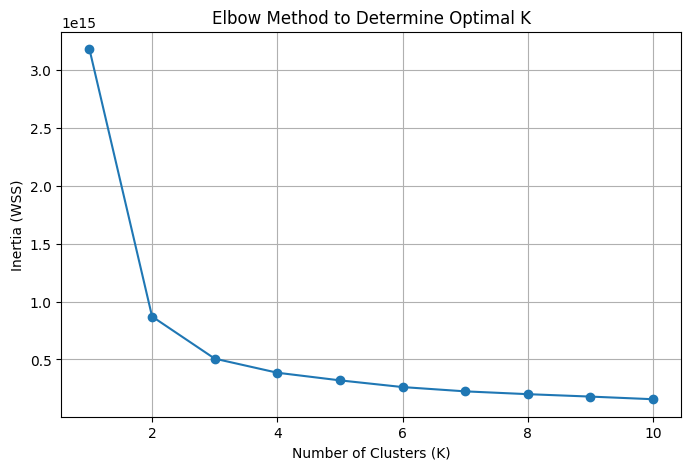

In [86]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load encoded dataset
encoded_df = pd.read_csv("encoded_data.csv")

# Fill missing values for 'rating_count' in encoded_df
encoded_df['rating_count'] = encoded_df['rating_count'].fillna(encoded_df['rating_count'].median())

# Remove any non-numerical columns (just in case) to create X
X = encoded_df.select_dtypes(include=['number'])

# Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)  # Use k here, not fixed 5
    model.fit(X)
    inertia.append(model.inertia_)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WSS)")
plt.grid(True)
plt.show()


In [93]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

# Set optimal K from elbow plot
optimal_k = 4

# Fit KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the dataset
encoded_df['Cluster'] = kmeans.labels_

# Save the model for future use
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("✅ KMeans model trained and saved.")

# Load cleaned original dataset
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Newfolder\Project4\output4\cleaned_data1.csv")  # Assuming you have this file ready

# Ensure indices match before merging
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Add cluster info to cleaned_df
df['Cluster'] = encoded_df['Cluster']

# Preview the result
print(df[['name', 'city', 'cuisine', 'Cluster']].head())


✅ KMeans model trained and saved.
                name    city                     cuisine  Cluster
0     AB FOODS POINT  Abohar            Beverages,Pizzas        0
1  Janta Sweet House  Abohar               Sweets,Bakery        0
2  theka coffee desi  Abohar                   Beverages        1
3          Singh Hut  Abohar            Fast Food,Indian        2
4      GRILL MASTERS  Abohar  Italian-American,Fast Food        0


In [94]:
en = pd.read_csv(r'C:\Users\LENOVO\Desktop\Newfolder\Project4\encoded_data.csv')
display(en)



,Unnamed: 0,id,name,rating,rating_count,cost,lic_no,link,address,menu,...,cuisine_Tandoor,cuisine_Telangana,cuisine_Tex-Mex,cuisine_Thai,cuisine_Thalis,cuisine_Tibetan,cuisine_Tribal,cuisine_Turkish,cuisine_Vietnamese,cuisine_Waffle
0,0,567335,AB FOODS POINT,4.0,NaN,200.0,22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,531342,Janta Sweet House,4.4,50.0,200.0,12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,158203,theka coffee desi,3.8,100.0,100.0,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,187912,Singh Hut,3.7,20.0,250.0,22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,543530,GRILL MASTERS,4.0,NaN,250.0,12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112678,148536,553122,The Food Delight,4.0,NaN,200.0,21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112679,148537,562647,MAITRI FOODS & BEVERAGES,4.0,NaN,300.0,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112680,148538,559435,Cafe Bella Ciao,4.0,NaN,300.0,21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112681,148539,418989,GRILL ZILLA,4.0,NaN,250.0,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
import pandas as pd
from sklearn.cluster import KMeans
import pickle

# === Step 1: Load encoded dataset ===
file_path = r'C:\Users\LENOVO\Desktop\Newfolder\Project4\encoded_data.csv'
df = pd.read_csv(file_path)

# === Step 2: Drop non-numeric columns ===
columns_to_drop = ['id', 'name', 'lic_no', 'link', 'address', 'menu']
df_numeric = df.drop(columns=columns_to_drop)

# === Step 3: Fill missing values (important!) ===
df_numeric = df_numeric.fillna(df_numeric.median(numeric_only=True))

# === Step 4: Save numeric-only dataset ===
numeric_file_path = r'C:\Users\LENOVO\Desktop\Newfolder\Project4\output4\encoded_numeric.csv'
df_numeric.to_csv(numeric_file_path, index=False)
print("✅ Cleaned numeric-only encoded data saved.")




✅ Cleaned numeric-only encoded data saved.


In [98]:
# Load cleaned numeric dataset for clustering ===
encoded_data = pd.read_csv(numeric_file_path)
print(f"📊 Shape of Encoded Numeric Data: {encoded_data.shape}")
print(f"📂 Columns: {list(encoded_data.columns[:10])} ... Total Columns: {len(encoded_data.columns)}")


📊 Shape of Encoded Numeric Data: (112683, 664)
📂 Columns: ['Unnamed: 0', 'rating', 'rating_count', 'cost', 'city_Abohar', 'city_Adilabad', 'city_Adityapur', 'city_Adoni', 'city_Agartala', 'city_Agra'] ... Total Columns: 664


In [ ]:

# Apply KMeans clustering ===
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(encoded_data)

# Save trained KMeans model ==
model_file_path = 'kmeans_model.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(kmeans, file)

print(f"✅ KMeans model with {num_clusters} clusters trained and saved to '{model_file_path}'.")


✅ KMeans model with 10 clusters trained and saved to 'kmeans_model.pkl'.
